client.get("nimj-3ivp", limit=2)
[{u'geolocation': {u'latitude': u'41.1085', u'needs_recoding': False, u'longitude': u'-117.6135'}, u'version': u'9', u'source': u'nn', u'region': u'Nevada', u'occurred_at': u'2012-09-14T22:38:01', u'number_of_stations': u'15', u'depth': u'7.60', u'magnitude': u'2.7', u'earthquake_id': u'00388610'}, {...}]

client.get("nimj-3ivp", where="depth > 300", order="magnitude DESC", exclude_system_fields=False)
[{u'geolocation': {u'latitude': u'-15.563', u'needs_recoding': False, u'longitude': u'-175.6104'}, u'version': u'9', u':updated_at': 1348778988, u'number_of_stations': u'275', u'region': u'Tonga', u':created_meta': u'21484', u'occurred_at': u'2012-09-13T21:16:43', u':id': 132, u'source': u'us', u'depth': u'328.30', u'magnitude': u'4.8', u':meta': u'{\n}', u':updated_meta': u'21484', u'earthquake_id': u'c000cnb5', u':created_at': 1348778988}, {...}]

client.get("nimj-3ivp/193", exclude_system_fields=False)
{u'geolocation': {u'latitude': u'21.6711', u'needs_recoding': False, u'longitude': u'142.9236'}, u'version': u'C', u':updated_at': 1348778988, u'number_of_stations': u'136', u'region': u'Mariana Islands region', u':created_meta': u'21484', u'occurred_at': u'2012-09-13T11:19:07', u':id': 193, u'source': u'us', u'depth': u'300.70', u'magnitude': u'4.4', u':meta': u'{\n}', u':updated_meta': u'21484', u':position': 193, u'earthquake_id': u'c000cmsq', u':created_at': 1348778988}

client.get("nimj-3ivp", region="Kansas")
[{u'geolocation': {u'latitude': u'38.10', u'needs_recoding': False, u'longitude': u'-100.6135'}, u'version': u'9', u'source': u'nn', u'region': u'Kansas', u'occurred_at': u'2010-09-19T20:52:09', u'number_of_stations': u'15', u'depth': u'300.0', u'magnitude': u'1.9', u'earthquake_id': u'00189621'}, {...}]
get_metadata(dataset_identifier, content_type="json")

In [2]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sodapy import Socrata
import requests
from tqdm import tqdm
import numpy as np

In [6]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata('openpaymentsdata.cms.gov',
                 'Jz9oHVfn5y4yT5DdO0HplDtR8',
                 "rickyli5962@gmail.com",
                 "LiXiao5962$")
client.timeout = 50

In [7]:
# Search OpenPayentData by physician specialty and find top physcians (ranked by payment amount)

results_list = []
dataset_ids = {2013: '9gtv-e3na',
               2015: 'rqr8-e3gy',
               2016: 'daqx-kcwf',
               2017: 'trby-32sz',
               2018: 'xrap-xhey'}

for year in tqdm([2013, 2015, 2016, 2017, 2018]):
    page = 0
    while True:
        results = client.get(dataset_ids[year],
                             content_type="json",
                             physician_specialty='Allopathic & Osteopathic Physicians|Internal Medicine|Pulmonary Disease',
                             limit=10000,
                             offset=page*10000) # recipient_city='New York City'
        # Convert to pandas DataFrame
        if len(results) > 0:
            results_list.append(pd.DataFrame.from_records(results)[['applicable_manufacturer_or_applicable_gpo_making_payment_name',                                                                                                         
                                                                    'payment_publication_date', 
                                                                    'physician_profile_id',
                                                                    'physician_first_name',
                                                                    'physician_last_name', 
                                                                    'physician_middle_name',   
                                                                    'physician_name_suffix',
                                                                    'physician_primary_type',
                                                                    'physician_profile_id',
                                                                    'physician_specialty',
                                                                    'program_year',
                                                                    'recipient_city',
                                                                    'recipient_country',
                                                                    'recipient_primary_business_street_address_line1',                                                
                                                                    'recipient_state',
                                                                    'recipient_zip_code',
                                                                    'applicable_manufacturer_or_applicable_gpo_making_payment_id',
                                                                    'total_amount_of_payment_usdollars',
                                                                    'date_of_payment',
                                                                    'number_of_payments_included_in_total_amount',
                                                                    'physician_ownership_indicator',
                                                                    'charity_indicator',
                                                                    'record_id',
                                                                    'nature_of_payment_or_transfer_of_value']])
            page += 1
        else:
            break

100%|██████████| 5/5 [09:37<00:00, 115.57s/it]


In [8]:
results_df = pd.concat(results_list)
results_df.shape

(1166003, 24)

In [9]:
results_df.to_csv(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\data 1.0-2013 - 2018.csv')

In [10]:
# Experiment with Pandas Pivot Table
data = pd.read_csv(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\data 1.0-2013 - 2018.csv')

In [11]:
# Pivot table return ranked physicians by total 
table = pd.pivot_table(data, values='total_amount_of_payment_usdollars',
                    index=['physician_profile_id'],
                    columns=[],
                    aggfunc=np.sum)

In [12]:
top_100 = list(table.reindex(table['total_amount_of_payment_usdollars'].sort_values( ascending=False).index).head(100).index)
top_100_df = data.loc[data['physician_profile_id'].isin(top_100)]
top_100_df.to_csv(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\Top 100-Vertex 1.0.csv')

#### 

In [5]:
# top_100 = pd.read_excel(r'C:\Users\rli\OneDrive - Huntsworth Health\MyFiles\Desktop\Gilead HCV KOL Project 150106419\HCV KOL Table 070819.xlsm', sheet_name='OpenPaymentData')['Physician ID']

In [19]:
results_list = []
dataset_ids = {2013: '9gtv-e3na',
               2015: 'rqr8-e3gy',
               2016: 'daqx-kcwf',
               2017: 'trby-32sz',
               2018: 'xrap-xhey'}
product_list = ['Sovaldi', 'Sofosbuvir', 'Mavyret', 'Glecaprevir', 'Pibrentasvir', 'Epclusa', 'Velpatasvir', 'Harvoni', 'Ledipasvir', 'Sofosbuvir', 'Vosevi', 'Voxilaprevir']

for product in tqdm(product_list):
    for year in [2016, 2017, 2018]:
        results = client.get(dataset_ids[year],
                             content_type="json",
                             Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1=product,
                             limit=10000000,
                            ) # recipient_city='New York City'
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))

        results = client.get(dataset_ids[year],
                             content_type="json",
                             Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2=product,
                             limit=100000,
                            ) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))
            
        results = client.get(dataset_ids[year],
                             content_type="json",
                             Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3=product,
                             limit=100000,
                            ) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))


data = pd.concat(results_list, sort=False)
data.shape

100%|██████████| 12/12 [01:12<00:00,  6.01s/it]


(76855, 61)

In [20]:
data.to_excel(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\product 2016-2018.xlsx')

In [21]:
len(results_list)

15

In [22]:
results_list = []
dataset_ids = {2013: '9gtv-e3na',
               2015: 'rqr8-e3gy',
               2016: 'daqx-kcwf',
               2017: 'trby-32sz',
               2018: 'xrap-xhey'}
product_list = ['Sovaldi', 'Sofosbuvir', 'Mavyret', 'Glecaprevir', 'Pibrentasvir', 'Epclusa', 'Velpatasvir', 'Harvoni', 'Ledipasvir', 'Sofosbuvir', 'Vosevi', 'Voxilaprevir']

for product in tqdm(product_list):
    for year in [2013, 2015]:
        results = client.get(dataset_ids[year],
                             content_type="json",
                             NDC_of_Associated_Covered_Drug_or_Biological1=product,
                             limit=1000000) # recipient_city='New York City'
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))

        results = client.get(dataset_ids[year],
                             content_type="json",
                             NDC_of_Associated_Covered_Drug_or_Biological2=product,
                             limit=1000000) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))
            
        results = client.get(dataset_ids[year],
                             content_type="json",
                             NDC_of_Associated_Covered_Drug_or_Biological3=product,
                             limit=1000000) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))

        results = client.get(dataset_ids[year],
                             content_type="json",
                             NDC_of_Associated_Covered_Drug_or_Biological4=product,
                             limit=1000000) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))

            
        results = client.get(dataset_ids[year],
                             content_type="json",
                             NDC_of_Associated_Covered_Drug_or_Biological5=product,
                             limit=1000000) # recipient_city='New York City'   
        if len(results) > 0:
            # Convert to pandas DataFrame
            results_list.append(pd.DataFrame.from_records(results))
            
data = pd.concat(results_list, sort=False)
data.shape

100%|██████████| 12/12 [00:38<00:00,  3.19s/it]


ValueError: No objects to concatenate

In [ ]:
data.to_excel(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\product 2013 / 2015.xlsx')

In [24]:
payment_aggregated = pd.DataFrame()
for physician_id in tqdm(top_100):
    physician = pd.DataFrame.from_dict(requests.get('https://openpaymentsdata.cms.gov/resource/g3bj-c2us.json?%24select=%3A*%2C%20*&%24where=(physician_profile_id%3D%27'+str(physician_id)+'%27)&%24group=&%24order=program_year%20DESC&%24limit=1000').json())
    payment_aggregated = pd.concat([payment_aggregated, physician], sort=False)

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


In [25]:
national = pd.DataFrame.from_dict(requests.get('https://openpaymentsdata.cms.gov/resource/g4ja-kp2b.json?%24select=%3A*%2C%20*&%24group=&%24order=payment_type%2C%20program_year%20asc&%24limit=1000').json())
specialty = pd.DataFrame.from_dict(requests.get('https://openpaymentsdata.cms.gov/resource/gbyk-sdtr.json?%24select=%3A*%2C%20*&%24where=(provider_type_description%20%3D%20%27Allopathic%20%26%20Osteopathic%20Physicians%27)%20and%20(classification%20%3D%20%27Internal%20Medicine%27)%20and%20(specialization%20%3D%20%27Pulmonary%20Disease%27)&%24group=&%24order=payment_type%2C%20program_year%20asc&%24limit=1000').json())

In [26]:
writer = pd.ExcelWriter(r'C:\Users\ehu\OneDrive - Huntsworth Health\MyFiles\Desktop\Open Payment Data\additional.xlsx', engine='xlsxwriter')
payment_aggregated.to_excel(writer, sheet_name='Payment_aggregated', index=False)
national.to_excel(writer, sheet_name='National', index=False)
specialty.to_excel(writer, sheet_name='Specialty', index=False)
data.to_excel(writer, sheet_name='Top_100', index=False)

In [ ]:
writer.save()# Finished - save
writer.close()# Finished - close

In [3]:
df= pd.read_excel(r'C:\Users\ehu\OneDrive - Huntsworth Health\Desktop\Open Payment Data\product 2016-2018.xlsx')

In [4]:
pbiy = df.groupby(['physician_profile_id','program_year'])['total_amount_of_payment_usdollars'].sum()
pbiy.head()

physician_profile_id  program_year
16.0                  2017            239.29
20.0                  2016            231.20
106.0                 2017             73.32
                      2018             27.40
135.0                 2018             14.60
Name: total_amount_of_payment_usdollars, dtype: float64

In [14]:
pbiy = df.groupby(['physician_profile_id','program_year'])['total_amount_of_payment_usdollars'].mean()
pbiy.head()

physician_profile_id  program_year
16.0                  2017            119.645
20.0                  2016            115.600
106.0                 2017             18.330
                      2018             13.700
135.0                 2018             14.600
Name: total_amount_of_payment_usdollars, dtype: float64

In [39]:
pby = df.groupby(['program_year'])['total_amount_of_payment_usdollars'].sum()
pby.head()

program_year
2016    9134075.60
2017    8378266.15
2018    8856031.69
Name: total_amount_of_payment_usdollars, dtype: float64

In [38]:
pby1 = df.groupby(['program_year'])['total_amount_of_payment_usdollars'].mean()
pby.head()

program_year
2016    9134075.60
2017    8378266.15
2018    8856031.69
Name: total_amount_of_payment_usdollars, dtype: float64

In [43]:
pbl = df.groupby(['recipient_state'])['total_amount_of_payment_usdollars'].sum()
pbl.head()

recipient_state
AK       1905.23
AL     578043.26
AR      53814.47
AZ     343398.54
CA    3876344.49
Name: total_amount_of_payment_usdollars, dtype: float64

In [42]:
pbl1 = df.groupby(['recipient_state'])['total_amount_of_payment_usdollars'].mean()
pbl.head()

recipient_state
AK     61.459032
AL    474.973919
AR    214.400279
AZ    271.676060
CA    387.944805
Name: total_amount_of_payment_usdollars, dtype: float64

In [69]:
pbl3 = pbl1.sort_values(ascending = False)
pbl3.head()

recipient_state
SD    794.234536
MN    594.305464
KS    528.440976
HI    512.365380
AL    474.973919
Name: total_amount_of_payment_usdollars, dtype: float64

In [50]:
pbl2 = df.sort_values(['recipient_state','total_amount_of_payment_usdollars'],ascending=False).groupby('recipient_state').head(3)
pbl2.head()

,Unnamed: 0,change_type,covered_recipient_type,physician_profile_id,physician_first_name,physician_last_name,recipient_primary_business_street_address_line1,recipient_city,recipient_state,recipient_zip_code,...,product_category_or_therapeutic_area_2,name_of_drug_or_biological_or_device_or_medical_supply_2,associated_drug_or_biological_ndc_2,recipient_province,recipient_postal_code,covered_or_noncovered_indicator_3,indicate_drug_or_biological_or_device_or_medical_supply_3,product_category_or_therapeutic_area_3,name_of_drug_or_biological_or_device_or_medical_supply_3,associated_drug_or_biological_ndc_3
30215,16271,UNCHANGED,Covered Recipient Physician,204263.0,CHARLES,KUCKEL,305 STOREY BLVD APT 3,CHEYENNE,WY,82009-3579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52739,4795,UNCHANGED,Covered Recipient Physician,204263.0,CHARLES,KUCKEL,2301 HOUSE AVE STE 300,CHEYENNE,WY,82001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43333,3280,UNCHANGED,Covered Recipient Physician,306392.0,DENNIS,BUTCHER,555 E BROADWAY,JACKSON,WY,83001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61422,4943,UNCHANGED,Covered Recipient Physician,9150.0,MOHAMAD,HAFFAR,117TH AVE,CHARLESTON,WV,25302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64444,478,UNCHANGED,Covered Recipient Physician,72144.0,SEYOUM,BAGE,800 GRAND CENTRAL MALL,VIENNA,WV,26105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pbn = df.groupby(['nature_of_payment_or_transfer_of_value'])['total_amount_of_payment_usdollars'].sum()
pbn.head()

nature_of_payment_or_transfer_of_value
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    18349089.75
Consulting Fee                                                                                                                                         2039935.12
Education                                                                                                                                                 7408.19
Food and Beverage                                                                                                                                      2618990.83
Space rental or facility fees(teaching hospital only)                                                                                                   142890.00
Name: total_amount_of_payment_usdollars, dtype: float64

In [46]:
pbn1 = df.groupby(['nature_of_payment_or_transfer_of_value'])['total_amount_of_payment_usdollars'].mean()
pbn.head()

nature_of_payment_or_transfer_of_value
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    2253.634211
Consulting Fee                                                                                                                                        2083.692666
Education                                                                                                                                               25.027669
Food and Beverage                                                                                                                                       45.619070
Space rental or facility fees(teaching hospital only)                                                                                                 2132.686567
Name: total_amount_of_payment_usdollars, dtype: float64

In [21]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

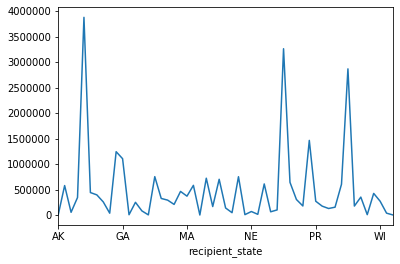

In [44]:
pbl.plot()

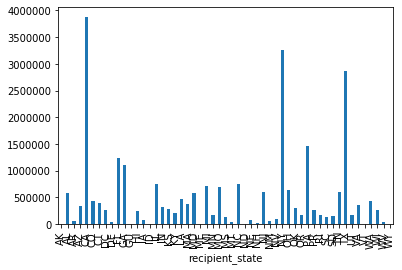

In [62]:
pbl.plot.bar()

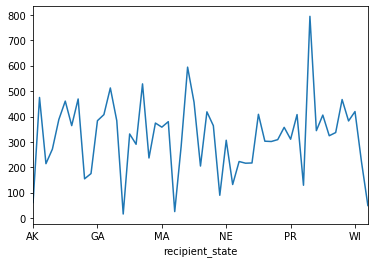

In [45]:
pbl1.plot()

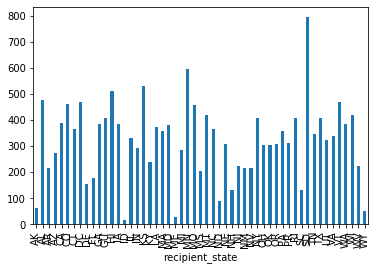

In [63]:
pbl1.plot.bar()

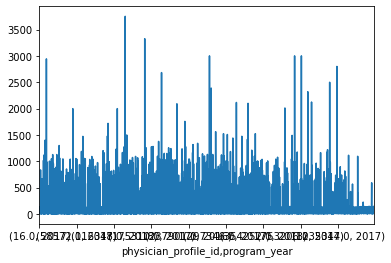

In [37]:
pbiy.plot()

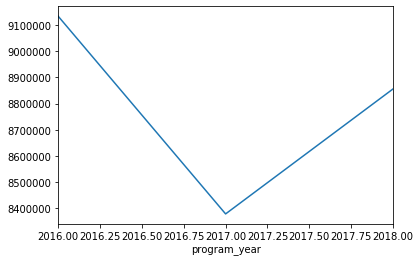

In [40]:
pby.plot()

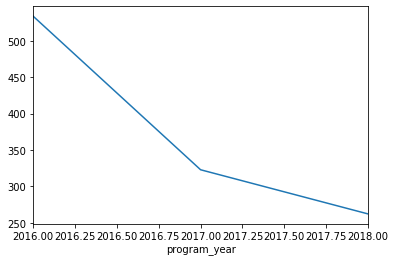

In [41]:
pby1.plot()

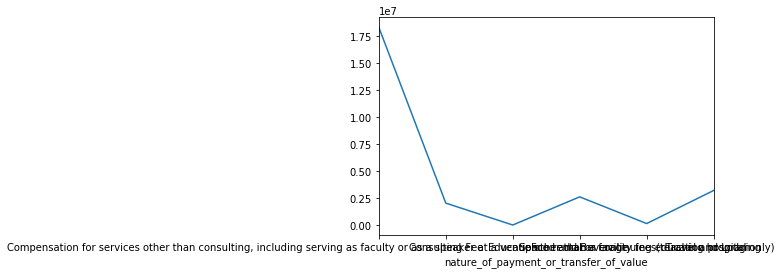

In [48]:
pbn.plot()

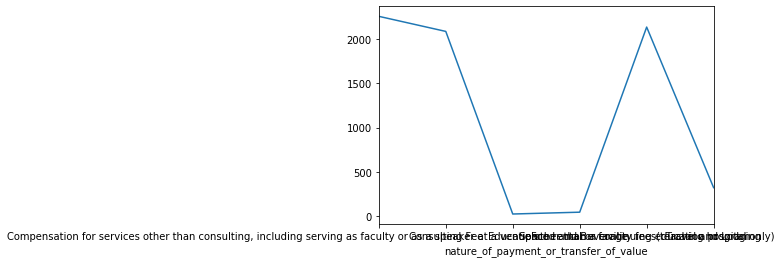

In [49]:
pbn1.plot()

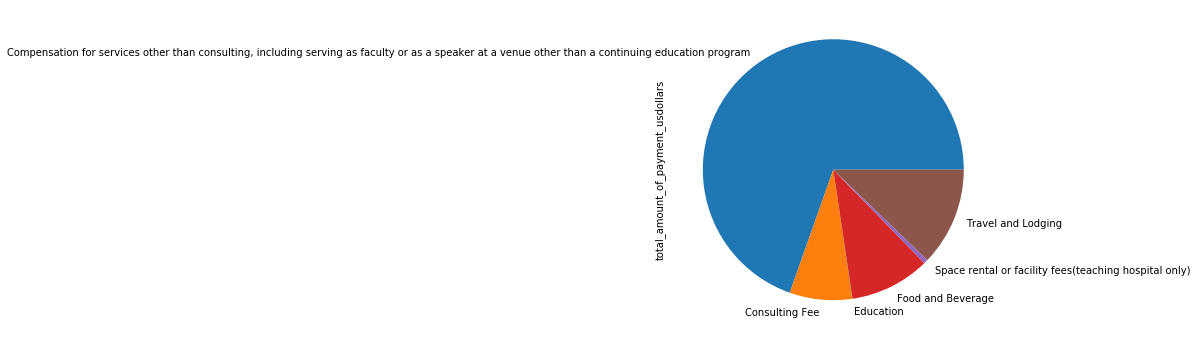

In [71]:
pbn.plot.pie(figsize = (6,6))

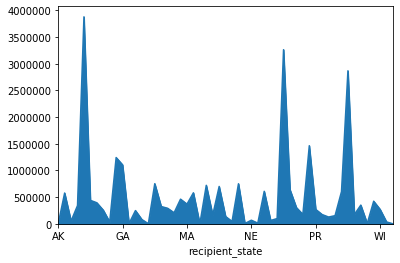

In [74]:
pbl.plot.area()

In [ ]:
pip install auto-sklearn

In [ ]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'openpayment_data.csv')

In [ ]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:, 62] = imp_median.fit_transform(df.iloc[:, 62].values.reshape(-1, 1))

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['applicable_manufacturer_or_applicable_gpo_making_payment_name',                                                                                                         
                                                                    'payment_publication_date', 
                                                                    'physician_profile_id',
                                                                    'physician_first_name',
                                                                    'physician_last_name', 
                                                                    'physician_middle_name',   
                                                                    'physician_name_suffix',
                                                                    'physician_primary_type',
                                                                    'physician_profile_id',
                                                                    'physician_specialty',
                                                                    'program_year',
                                                                    'recipient_city',
                                                                    'recipient_country',
                                                                    'recipient_primary_business_street_address_line1',                                                
                                                                    'recipient_state',
                                                                    'recipient_zip_code',
                                                                    'applicable_manufacturer_or_applicable_gpo_making_payment_id',
                                                                    'total_amount_of_payment_usdollars',
                                                                    'date_of_payment',
                                                                    'number_of_payments_included_in_total_amount',
                                                                    'physician_ownership_indicator',
                                                                    'charity_indicator',
                                                                    'record_id',
                                                                    'nature_of_payment_or_transfer_of_value']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

transformed=column_trans.fit_transform(churn_df)

In [ ]:
df_trans = df.copy()
df_trans = pd.DataFrame(transformed, columns=categorical_columns).astype(int)

In [ ]:
df.update(df_trans)

In [ ]:
df_X = df.copy()
df_y =  df_X.pop('total_amount_of_payment_usdollars')
df_y=pd.to_numeric(df_y).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.75, test_size=0.25)

In [ ]:
import autosklearn.classification

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=2,
    include_estimators=["random_forest", "sgd", ], exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None)

In [ ]:
automl.fit(X_train, y_train) 

In [ ]:
print(automl.show_models())

[(0.740000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'classifier:sgd:alpha': 0.00015020473455612936, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.00019916862821730384, 'classifier:sgd:eta0': 0.00017377549695989675},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 1.4661311331774623e-07, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'invscaling', 'classifier:sgd:loss': 'hinge', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.001351277100752401, 'classifier:sgd:eta0': 5.979636547652925e-05, 'classifier:sgd:l1_ratio': 0.11209870868967255, 'classifier:sgd:power_t': 0.48700117227462425},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'quantile_transformer', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:sgd:alpha': 1.2857846469578073e-06, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'hinge', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.04410667380969407, 'rescaling:quantile_transformer:n_quantiles': 1586, 'rescaling:quantile_transformer:output_distribution': 'uniform', 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.09986646131126313, 'classifier:sgd:eta0': 5.946575545445311e-07},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'quantile_transformer', 'classifier:sgd:alpha': 6.688106445393722e-05, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'optimal', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.00015920784559559734, 'rescaling:quantile_transformer:n_quantiles': 1911, 'rescaling:quantile_transformer:output_distribution': 'normal', 'classifier:sgd:epsilon': 0.008825370738954516, 'classifier:sgd:l1_ratio': 0.5999644226837954},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'classifier:sgd:alpha': 0.0003348203349978078, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 1.2238863635799662e-05, 'classifier:sgd:epsilon': 0.00010000000000000009, 'classifier:sgd:eta0': 0.010000000000000014},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5131630663901667, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 4, 'classifier:random_forest:min_samples_split': 19, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 2.3015714930836486e-07, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'optimal', 'classifier:sgd:loss': 'log', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.0004301886169338696, 'classifier:sgd:l1_ratio': 7.491545078267923e-09},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 0.000189369754599942, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 0.00011770874156197604, 'classifier:sgd:eta0': 0.010000000000000014},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
][(0.740000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'classifier:sgd:alpha': 0.00015020473455612936, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.00019916862821730384, 'classifier:sgd:eta0': 0.00017377549695989675},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 1.4661311331774623e-07, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'invscaling', 'classifier:sgd:loss': 'hinge', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.001351277100752401, 'classifier:sgd:eta0': 5.979636547652925e-05, 'classifier:sgd:l1_ratio': 0.11209870868967255, 'classifier:sgd:power_t': 0.48700117227462425},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'quantile_transformer', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:sgd:alpha': 1.2857846469578073e-06, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'hinge', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.04410667380969407, 'rescaling:quantile_transformer:n_quantiles': 1586, 'rescaling:quantile_transformer:output_distribution': 'uniform', 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.09986646131126313, 'classifier:sgd:eta0': 5.946575545445311e-07},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'quantile_transformer', 'classifier:sgd:alpha': 6.688106445393722e-05, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'optimal', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.00015920784559559734, 'rescaling:quantile_transformer:n_quantiles': 1911, 'rescaling:quantile_transformer:output_distribution': 'normal', 'classifier:sgd:epsilon': 0.008825370738954516, 'classifier:sgd:l1_ratio': 0.5999644226837954},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'classifier:sgd:alpha': 0.0003348203349978078, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 1.2238863635799662e-05, 'classifier:sgd:epsilon': 0.00010000000000000009, 'classifier:sgd:eta0': 0.010000000000000014},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5131630663901667, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 4, 'classifier:random_forest:min_samples_split': 19, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 2.3015714930836486e-07, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'optimal', 'classifier:sgd:loss': 'log', 'classifier:sgd:penalty': 'elasticnet', 'classifier:sgd:tol': 0.0004301886169338696, 'classifier:sgd:l1_ratio': 7.491545078267923e-09},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'classifier:sgd:alpha': 0.000189369754599942, 'classifier:sgd:average': 'False', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 0.00011770874156197604, 'classifier:sgd:eta0': 0.010000000000000014},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
]


In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 553a1a40e63a8853764d97603c9919e0
  Metric: accuracy
  Best validation score: 0.799885
  Number of target algorithm runs: 148
  Number of successful target algorithm runs: 148
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

In [ ]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'categorical_encoding:__choice__': 'no_encoding',
 'classifier:__choice__': 'sgd',
 'classifier:sgd:alpha': 6.688106445393722e-05,
 'classifier:sgd:average': 'True',
 'classifier:sgd:epsilon': 0.008825370738954516,
 'classifier:sgd:fit_intercept': 'True',
 'classifier:sgd:l1_ratio': 0.5999644226837954,
 'classifier:sgd:learning_rate': 'optimal',
 'classifier:sgd:loss': 'modified_huber',
 'classifier:sgd:penalty': 'elasticnet',
 'classifier:sgd:tol': 0.00015920784559559734,
 'imputation:strategy': 'mean',
 'preprocessor:__choice__': 'no_preprocessing',
 'rescaling:__choice__': 'quantile_transformer',
 'rescaling:quantile_transformer:n_quantiles': 1911,
 'rescaling:quantile_transformer:output_distribution': 'normal'}

In [ ]:
predictions = automl.predict(X_test)

In [ ]:
import sklearn.metrics
print("R2 score", sklearn.metrics.r2_score(y_test, predictions))

R2 score 0.9303350369108461

In [1]:
# print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))
# print(sklearn.metrics.precision_score(y_test, predictions))
# print(sklearn.metrics.recall_score(y_test, predictions))